<a href="https://colab.research.google.com/github/Preeth-09/AI_ML_Avanthi_preethi/blob/main/Rainfall_prediction_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split



In [27]:
df=pd.read_csv('/content/archive (3).zip')
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**While we should be abe to fill in missing values for most columns,it might be a good idea to discard the rows where value for raintoday and rain tomorrow is missing to make our analysis and modelling**

In [29]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

DATA ANALYSIS AND VISUALIZATION

**bold text**

In [31]:
pip install plotly matplotlib seaborn --quiet


In [32]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [33]:
px.histogram(df,x='Location', title='Location vs. Rainy Days',color='RainToday')


In [34]:
px.histogram(df,x='Temp3pm',title='Temperature at 3pm vs. Rain Tomorrow', color='RainTomorrow')


IF THE TEMPERATURE IS LOW THEN RAINFALL IS HIGHER

**bold text**

In [35]:
px.histogram(df,x='RainTomorrow',color='RainToday',title='Rain Tomorrow vs. Rain Today')




This is called as class balance



In [36]:
px.scatter(df.sample(2000),title='Min Temp. vs Max Temp.',x='MinTemp',y='MaxTemp',color='RainToday')


In [37]:
px.strip(df.sample(2000),title='Temp (3pm) vs. Humidity (3pm)',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')


When working with massive datasets containing millions of row, its good idea to work with a sample initially,to quickly set up model.set the value of use_sample to true.(optional)

In [38]:
use_sample = False


In [39]:
sample_fraction = 0.1


In [40]:
if use_sample:
  df=df.sample(frac=sample_fraction).copy()


Use 60% of the data for training set,20% for validation set,20% for the test set.

In [47]:
df
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [49]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df,val_df = train_test_split(train_val_df, test_size=0.25,random_state=42)

In [51]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :',val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


In [55]:
df
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


while working with dates, its better to seperate the training validation and test sets with time, so that the model is trained on data from the past and evaluted on data from future
for the current dataset, we use date column in the dataset to create another column for year, we'll pick the last 2 years for the test set and one year before it for the validation set

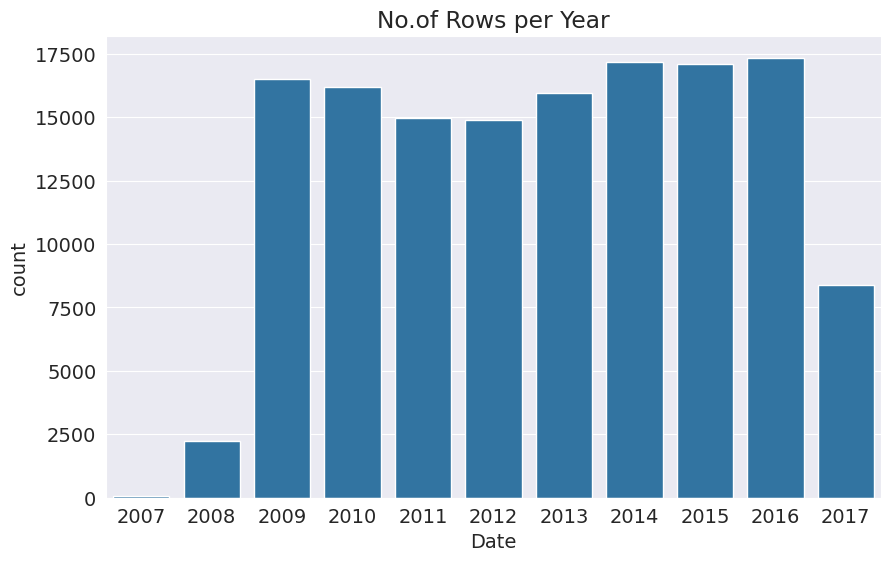

In [56]:
plt.title('No.of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [59]:
year = pd.to_datetime(df.Date).dt.year
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [60]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :',val_df.shape)
print('test_df.shape :',test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


here, the test validation and test sets contain data for all 12 months

In [61]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [63]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [64]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


**Identifying input and target columns**
we only want to weather conditions to make a prediction anout whether it will rain the next day
here, we create a list of input columns, and also identify the target column

In [65]:
input_cols = list(train_df.columns)[1:-1]
target_col ='RainTomorrow'

In [69]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [70]:
target_col

'RainTomorrow'

we can now create inputs and targets for the training , validation and test sets for processing and model training

In [71]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [72]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [73]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [74]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [75]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object